# OkCupid Analysis Part 4 - Modeling the Data

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [154]:
from sklearn.linear_model import LinearRegression

In [206]:
df = pd.read_csv('new_df.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means. 1. i am...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [207]:
list(df)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [208]:
df_1 = df[['age', 'drinks', 'drugs', 'height', 'income', 'smokes', 'sex']]

In [209]:
df_1.drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [210]:
df_1 = df_1.replace({'drinks' : {'not at all' : 0, 'rarely' : 1, 'socially' : 3, 
                         'often' : 4, 'very often' : 5, 'desperately' : 6}})

In [211]:
df_1.drugs.unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [212]:
df_1 = df_1.replace({'drugs' : {'never' : 0, 'sometimes' : 1, 'often' : 3}})

In [213]:
df_1.smokes.unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'], dtype=object)

In [214]:
df_1 = df_1.replace({'smokes' : {'no' : 0, 'trying to quit' : 1, 
                                 'when drinking' : 3, 'sometimes' : 4,
                                 'yes' : 5}})

In [215]:
df_1.income.unique()

array([ -1.00000000e+00,              nan,   2.00000000e+04,
         4.00000000e+04,   3.00000000e+04,   5.00000000e+04,
         6.00000000e+04,   1.00000000e+05,   8.00000000e+04,
         5.00000000e+05,   1.50000000e+05,   7.00000000e+04,
         2.50000000e+05,   1.00000000e+06])

In [216]:
df_1 = df_1.replace({'income' : {-1.0 : np.nan}})

In [217]:
df_1 = df_1.replace({'sex' : {'m' : 0, 'f' : 1,}})

In [218]:
df_1.head()

,age,drinks,drugs,height,income,smokes,sex
0,22,3.0,0.0,75.0,NaN,4.0,0
1,35,4.0,1.0,70.0,NaN,0.0,0
2,38,3.0,NaN,68.0,NaN,0.0,0
3,23,3.0,NaN,71.0,20000.0,0.0,0
4,29,3.0,0.0,66.0,NaN,0.0,0


In [219]:
len(df_1)

59946

In [220]:
df_1 = df_1.dropna()
len(df_1)

8834

In [221]:
df_1.head()

,age,drinks,drugs,height,income,smokes,sex
11,28,3.0,0.0,72.0,40000.0,0.0,0
13,30,3.0,0.0,66.0,30000.0,0.0,1
14,29,3.0,0.0,62.0,50000.0,0.0,1
66,22,1.0,0.0,65.0,20000.0,0.0,0
73,31,3.0,0.0,61.0,50000.0,0.0,1


In [222]:
X = df_1[['age', 'drinks', 'drugs', 'height', 'income', 'smokes']]
y = df_1[['sex']]
X = np.array(X)
y = np.array(y).ravel()

In [223]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
sex_names = df_1.sex.unique()
print(sex_names[knn.predict([[28, 3, 1, 72, 40000, 1]]).astype('int64')])

[0]


In [244]:
# KNN-Prediction of sex for: [['age', 'drinks', 'drugs', 
#                            'height', 'income', 'smokes']]

# Where age:    {Number of years}
#       drinks: {'not at all' : 0,
#                'rarely' : 1,
#                'socially' : 3, 
#                'often' : 4,
#                'very often' : 5,
#                'desperately' : 6}
#       drugs:  {'never' : 0, 
#                'sometimes' : 1, 
#                'often' : 3}
#       height: {Number of inches}
#       income: {Dollars per year}
#       smokes: {'no' : 0,
#                'trying to quit' : 1,
#                'when drinking' : 3,
#                'sometimes' : 4,
#                'yes' : 5}})

In [240]:
def knnpredict(age, drinks, drugs, height, income, smokes):
    from sklearn import neighbors
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)
    sex_names = df_1.sex.unique()
    m_or_f = (sex_names[knn.predict([[
              age, drinks, drugs, height, income, smokes]]).astype('int64')])
    if m_or_f == 0:
        m_or_f = 'male'
    else:
        m_or_f = 'female'
    print('KNN prediction: ', m_or_f)

In [250]:
knnpredict(30, 3, 0, 66, 100000, 0)

KNN prediction:  male


In [252]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (8834, 2)


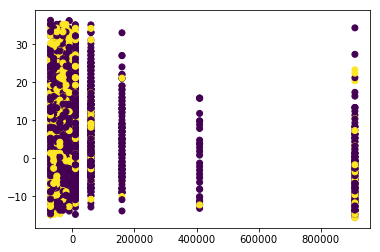

In [253]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y);

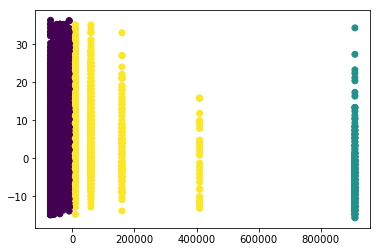

In [254]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);